We will perform analysis and cleaning with data on motor vehicle collisions released by New York City and published on the NYC OpenData website (https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95). There is data on over 1.5 million collisions dating back to 2012, with additional data continuously added. We'll work with an extract of the full data: Crashes from the year 2018. Our data set is in a CSV called nypd_mvc_2018.csv. We can read our data into a pandas dataframe and inspect the first few rows of the data:

In [55]:
import pandas as pd
import numpy as np
mvc = pd.read_csv("nypd_mvc_2018.csv")
mvc.head(10)

,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,motorist_injured,total_injured,pedestrians_killed,cyclist_killed,motorist_killed,total_killed,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
0,3869058,2018-03-23,21:40,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,10 AVENUE,NaN,0,0,0,0.0,0,0,0,0.0,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN
1,3847947,2018-02-13,14:45,BROOKLYN,"(40.623714, -73.99314)",16 AVENUE,62 STREET,NaN,0,0,0,0.0,0,0,0,0.0,SPORT UTILITY / STATION WAGON,DS,NaN,NaN,NaN,Backing Unsafely,Unspecified,NaN,NaN,NaN
2,3914294,2018-06-04,0:00,NaN,"(40.591755, -73.9083)",BELT PARKWAY,NaN,NaN,0,0,1,1.0,0,0,0,0.0,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN
3,3915069,2018-06-05,6:36,QUEENS,"(40.73602, -73.87954)",GRAND AVENUE,VANLOON STREET,NaN,0,0,0,0.0,0,0,0,0.0,Sedan,Sedan,NaN,NaN,NaN,Glare,Passing Too Closely,NaN,NaN,NaN
4,3923123,2018-06-16,15:45,BRONX,"(40.884727, -73.89945)",NaN,NaN,208 WEST 238 STREET,0,0,0,0.0,0,0,0,0.0,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,Turning Improperly,Unspecified,NaN,NaN,NaN
5,3987177,2018-09-14,11:50,NaN,"(40.785984, -73.95718)",EAST 93 STREET,NaN,NaN,0,0,0,0.0,0,0,0,0.0,Station Wagon/Sport Utility Vehicle,Box Truck,NaN,NaN,NaN,Driver Inattention/Distraction,Passing Too Closely,NaN,NaN,NaN
6,4008417,2018-10-19,11:00,QUEENS,"(40.731968, -73.923225)",54 AVENUE,44 STREET,NaN,0,0,0,0.0,0,0,0,0.0,Sedan,Sedan,NaN,NaN,NaN,Unspecified,Unspecified,NaN,NaN,NaN
7,3917518,2018-06-05,10:00,NaN,"(40.660114, -74.00191)",3 AVENUE,NaN,NaN,0,0,0,0.0,0,0,0,0.0,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,Unspecified,Unspecified,NaN,NaN,NaN
8,3953286,2018-08-03,22:30,QUEENS,"(40.666393, -73.75177)",NORTH CONDUIT AVENUE,225 STREET,NaN,0,0,3,3.0,0,0,0,0.0,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,Unspecified,Unspecified,NaN,NaN,NaN
9,3896388,2018-05-08,8:40,QUEENS,"(40.715763, -73.737755)",218 STREET,99 AVENUE,NaN,0,0,0,0.0,0,0,0,0.0,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN,Unspecified,NaN,NaN,NaN,NaN


In [8]:
mvc.shape

(57864, 26)

We can see a lot of NaN values already. Let's count the number of null values in each of the columns in the mvc dataframe above.

In [33]:
null_counts = mvc.isnull().sum()

print(null_counts)

unique_key                 0
date                       0
time                       0
borough                20646
location                3885
on_street              13961
cross_street           29249
off_street             44093
pedestrians_injured        0
cyclist_injured            0
motorist_injured           0
total_injured              1
pedestrians_killed         0
cyclist_killed             0
motorist_killed            0
total_killed               5
vehicle_1                355
vehicle_2              12262
vehicle_3              54352
vehicle_4              57158
vehicle_5              57681
cause_vehicle_1          175
cause_vehicle_2         8692
cause_vehicle_3        54134
cause_vehicle_4        57111
cause_vehicle_5        57671
dtype: int64


To give us a better picture of the null values in the data, let's calculate the percentage of null values in each column.

In [34]:
null_df = pd.DataFrame(null_counts)

In [35]:
null_df.columns = ["null_counts"]
null_df["null_pct"] = null_df["null_counts"]*100/mvc.shape[0]
# Rotate the dataframe so that rows become columns and vice-versa
null_df = null_df.T.astype(int)
pd.set_option('display.max_columns', None)
null_df.head(10)

,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,motorist_injured,total_injured,pedestrians_killed,cyclist_killed,motorist_killed,total_killed,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
null_counts,0,0,0,20646,3885,13961,29249,44093,0,0,0,1,0,0,0,5,355,12262,54352,57158,57681,175,8692,54134,57111,57671
null_pct,0,0,0,35,6,24,50,76,0,0,0,0,0,0,0,0,0,21,93,98,99,0,15,93,98,99


About a third of the columns have no null values, with the rest ranging from less than 1% to 99%.  Let's continue by looking at the group of columns that relate to people killed in collisions.

In [43]:
killed_cols = [column_name for column_name in mvc.columns if column_name.find("kill")>0]
null_df[killed_cols]

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
null_counts,0,0,0,5
null_pct,0,0,0,0


In [47]:
killed = mvc[killed_cols].copy()
killed_manual_sum = killed.iloc[:,0] + killed.iloc[:,1] + killed.iloc[:,2]
killed_mask = killed_manual_sum != killed["total_killed"]
killed_non_eq = killed[killed_mask]

In [49]:
killed_non_eq.head(10)

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
3508,0,0,0,NaN
20163,0,0,0,NaN
22046,0,0,1,0.0
48719,0,0,0,NaN
55148,0,0,0,NaN
55699,0,0,0,NaN


The dataframe we created above contained six rows showing a discrepancy between the sum of the first three columns and the fourth column that lists the total. Clearly, five of the six columns for the total contain null while they should actually be zero, and the other should have a value of 1 instead of 0. Let's replace all null values with the equivalent values from our killed_manual_sum series:

In [56]:
killed_null = killed['total_killed'].isnull()
killed['total_killed'] = killed['total_killed'].mask(killed_null, killed_manual_sum)

Next replace any values where the manual sum and the total column aren't equal with np.nan

In [59]:
killed['total_killed'] = killed['total_killed'].mask(killed['total_killed'] != killed_manual_sum, np.nan)

In [58]:
killed_non_eq = killed[killed_mask]
killed_non_eq.head(10)

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
3508,0,0,0,0.0
20163,0,0,0,0.0
22046,0,0,1,NaN
48719,0,0,0,0.0
55148,0,0,0,0.0
55699,0,0,0,0.0


We've cleaned the data set and reduced the five null value occurances to one, and flagged some suspicious data. Let's do the same for the injured columns below.

In [80]:
# Create an injured dataframe and manually sum values
injured = mvc[[col for col in mvc.columns if 'injured' in col]].copy()
injured_manual_sum = injured.iloc[:,:3].sum(axis=1)
injured_null = injured["total_injured"].isnull()
injured["total_injured"].mask(injured_null,injured_manual_sum,inplace=True)
injured[(injured["total_injured"]!=injured_manual_sum)].head(25)

,pedestrians_injured,cyclist_injured,motorist_injured,total_injured
1222,0,0,1,0.0
3263,0,0,3,4.0
3362,0,0,0,1.0
3508,0,0,0,2.0
10989,0,0,0,1.0
12885,1,0,0,0.0
13344,0,0,0,1.0
15213,0,0,0,2.0
20163,0,0,0,1.0
20978,0,0,0,1.0


We can see there are clear discrepencies, and we don't know which sum to trust. So we can mark these values as NaN.

In [81]:
injured["total_injured"].mask(injured["total_injured"]!=injured_manual_sum, np.nan,inplace=True)

In [84]:
summary = {
    'injured': [
        mvc['total_injured'].isnull().sum(),
        injured['total_injured'].isnull().sum()
    ],
    'killed': [
        mvc['total_killed'].isnull().sum(),
        killed['total_killed'].isnull().sum()
    ]
}
print("Summary of the number of null values before and after our changes in order to clean the values","\n")
print(pd.DataFrame(summary, index=['before','after']))

Summary of the number of null values before and after our changes in order to clean the values 

        injured  killed
before        1       5
after        21       1


Assign the updated values from the killed and injured dataframe back to the main mvc dataframe.

In [86]:
mvc["total_injured"]=injured["total_injured"]
mvc["total_killed"]=killed["total_killed"]

Let's use a plot to visualize the missing values, using heat maps. We can use seaborn.heatmap() to represent null values as light squares and non-null values as dark squares

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [100]:
def plot_null_matrix(df, figsize=(10,5)):
    # initiate the figure
    plt.figure(figsize=figsize)
    # create a boolean dataframe based on whether values are null
    df_null = df.isnull()
    # create a heatmap of the boolean dataframe
    sns.heatmap(~df_null, cbar=False, yticklabels=False)
    plt.xticks(rotation=90, size='x-large')
    plt.show()

Let's plot the null matrix for the whole dataframe we are working with:

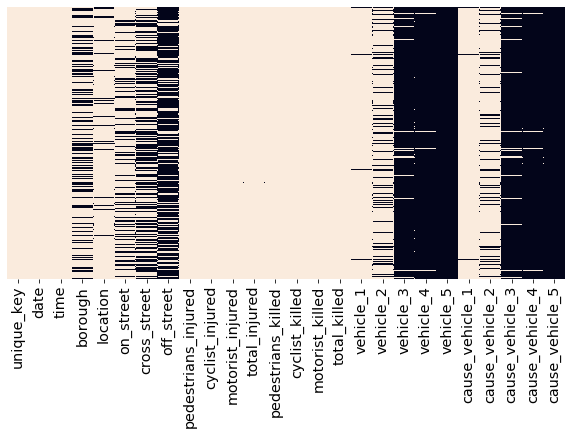

In [101]:
plot_null_matrix(mvc)

It appears that most of the missing data is centered around vehicles 3-5 dataas well as some street address information. 

Create function to create correlation plots and then plot the data in the last ten columns to see if we can isolate any trends or get some insight into the relationship between the data in the columns.

In [110]:
def plot_null_correlations(df):
    # create a correlation matrix only for columns with at least
    # one missing value
    cols_with_missing_vals = df.columns[df.isnull().sum() > 0]
    missing_corr = df[cols_with_missing_vals].isnull().corr()
    
    # create a triangular mask to avoid repeated values and make
    # the plot easier to read
    missing_corr = missing_corr.iloc[1:, :-1]
    mask = np.triu(np.ones_like(missing_corr), k=1)
    
    # plot a heatmap of the values
    plt.figure(figsize=(20,14))
    ax = sns.heatmap(missing_corr, vmin=-1, vmax=1, cbar=False,
                     cmap='RdBu', mask=mask, annot=True)
    
    # format the text in the plot to make it easier to read
    for text in ax.texts:
        t = float(text.get_text())
        if -0.05 < t < 0.01:
            text.set_text('')
        else:
            text.set_text(round(t, 2))
        text.set_fontsize('x-large')
    plt.xticks(rotation=90, size='x-large')
    plt.yticks(rotation=0, size='x-large')

    plt.show()

Create a list of column names containing the substring 'vehicle'

In [111]:
list_vehicles = [column for column in mvc.columns if "vehicle" in column]
print(list_vehicles)

['vehicle_1', 'vehicle_2', 'vehicle_3', 'vehicle_4', 'vehicle_5', 'cause_vehicle_1', 'cause_vehicle_2', 'cause_vehicle_3', 'cause_vehicle_4', 'cause_vehicle_5']


Now select only the columns in the list above from the mvc dataframe. Pass the result to the plot_null_correlations() function

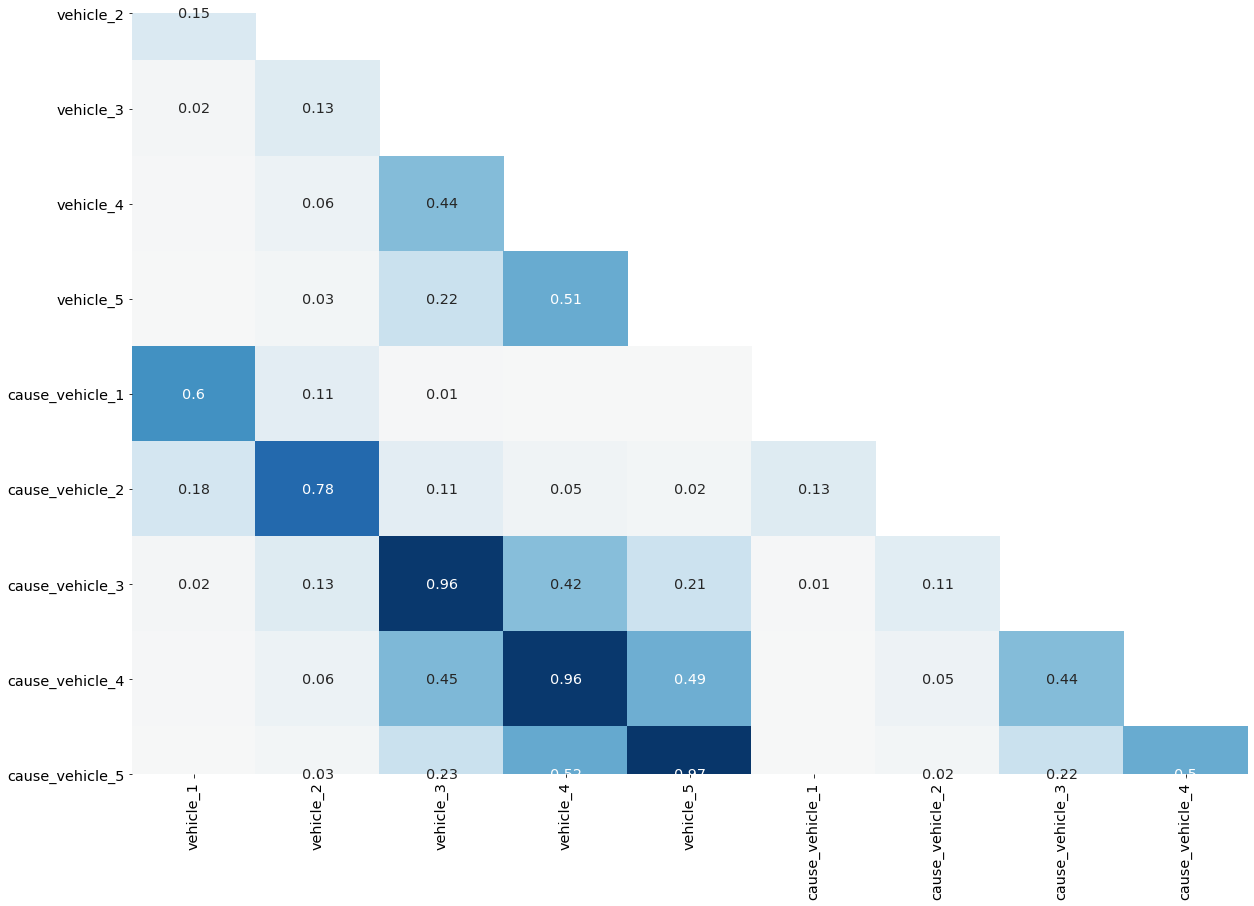

In [112]:
plot_null_correlations(mvc[list_vehicles])